In [4]:
# Importing necessary libraries & modules; checking system compatibility
import sys, pip, numpy as np, pandas as pd, matplotlib.pyplot as plt
from streaming_func import clean_streaming_df
print(sys.executable)
print(sys.version)
print(pip.__version__)
print(np.__version__, pd.__version__)

/Users/jonaskorganas/coding_projects/streaming_analysis/.venv/bin/python
3.14.2 (main, Dec  5 2025, 16:49:16) [Clang 17.0.0 (clang-1700.4.4.1)]
25.3
2.3.5 2.3.3


In [5]:
# Loading Disney+ dataset & info on it for understanding structure & content

disney_ds_path = '/Users/jonaskorganas/coding_projects/streaming_analysis/disney_plus_titles.csv'
disney_df = pd.read_csv(disney_ds_path)
print(disney_df.head(), '\n')
print(disney_df.info())

  show_id     type                                             title  \
0      s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1      s2    Movie                            Ernest Saves Christmas   
2      s3    Movie                      Ice Age: A Mammoth Christmas   
3      s4    Movie                        The Queen Family Singalong   
4      s5  TV Show                             The Beatles: Get Back   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                                NaN   

                                                cast        country  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...            NaN   
1           Jim Varney, Noelle Parker, Douglas Seale            NaN   
2  Raymond Albert Romano, John Leguizamo, Denis L...  United States   
3  Darren Criss, Adam Lambert, Derek Hough

In [6]:
disney_df.cast[1].split(', ')

['Jim Varney', 'Noelle Parker', 'Douglas Seale']

In [7]:
# Data cleaning function for Amazon Prime dataset for easier exploration & manipulation

test_disney_df = clean_streaming_df(disney_df)
print(test_disney_df.head(), '\n')
print(test_disney_df.info())

  show_id     type                                             title  \
0      s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1      s2    Movie                            Ernest Saves Christmas   
2      s3    Movie                      Ice Age: A Mammoth Christmas   
3      s4    Movie                        The Queen Family Singalong   
4      s5  TV Show                             The Beatles: Get Back   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                                NaN   

                                                cast          country  \
0  [Chris Diamantopoulos, Tony Anselmo, Tress Mac...               []   
1         [Jim Varney, Noelle Parker, Douglas Seale]               []   
2  [Raymond Albert Romano, John Leguizamo, Denis ...  [United States]   
3  [Darren Criss, Adam Lambert, De

In [8]:
disney_df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [39]:
unique_genre_types = disney_df.listed_in.unique()
print("Media types in disney dataset:", unique_genre_types)

Media types in disney dataset: ['Animation, Family' 'Comedy' 'Animation, Comedy, Family' 'Musical'
 'Docuseries, Historical, Music' 'Biographical, Documentary'
 'Action-Adventure, Superhero' 'Docuseries, Reality, Survival'
 'Animals & Nature, Docuseries, Family' 'Comedy, Family, Musical'
 'Documentary' 'Comedy, Family, Music' 'Documentary, Family'
 'Action-Adventure, Animals & Nature, Docuseries' 'Animals & Nature'
 'Animation' 'Animation, Kids' 'Comedy, Coming of Age, Drama'
 'Comedy, Family, Fantasy' 'Animation, Comedy, Drama'
 'Animation, Family, Fantasy' 'Action-Adventure, Animation, Comedy'
 'Comedy, Family' 'Action-Adventure, Comedy, Family' 'Lifestyle' 'Movies'
 'Action-Adventure, Science Fiction'
 'Action-Adventure, Fantasy, Superhero' 'Coming of Age, Music'
 'Animation, Drama' 'Concert Film, Music'
 'Animation, Comedy, Coming of Age' 'Animation, Comedy'
 'Animation, Crime, Family' 'Science Fiction' 'Action-Adventure, Fantasy'
 'Comedy, Fantasy, Kids' 'Action-Adventure, Comedy,

In [9]:
# Movies-only DataFrame
test_movies_df = test_disney_df[test_disney_df["type"] == "Movie"].copy()

# TV-Shows-only DataFrame
test_tv_shows_df = test_disney_df[test_disney_df["type"] == "TV Show"].copy()

print("Movies:", len(test_movies_df))
print("TV Shows:", len(test_tv_shows_df))

Movies: 1052
TV Shows: 398


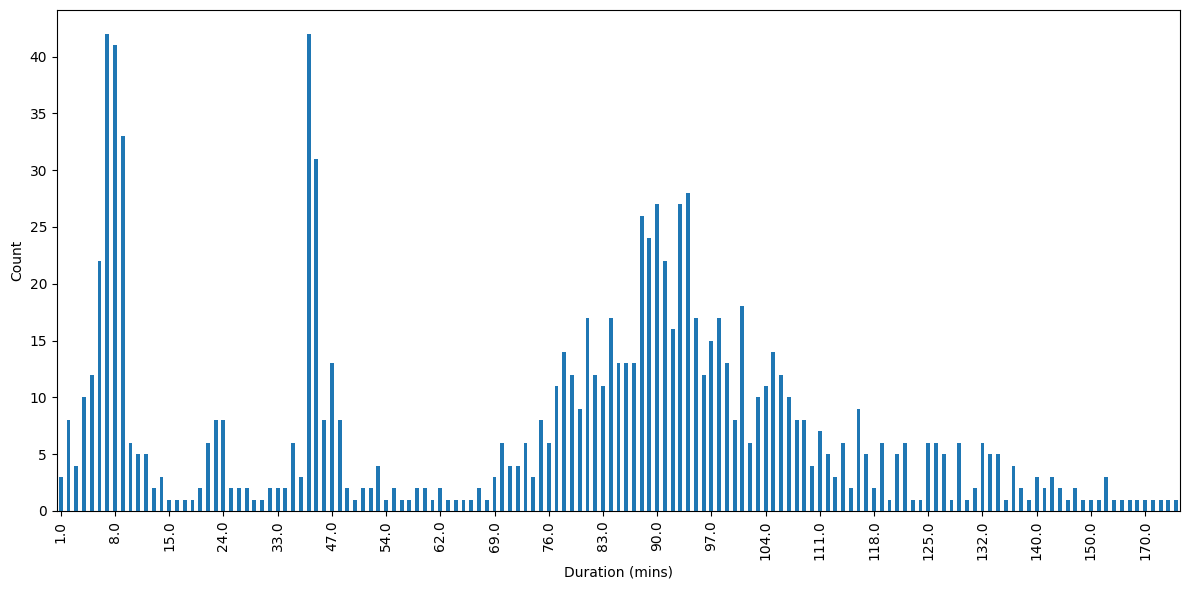

In [10]:
movies_ax = test_movies_df.groupby("duration_mins").size().plot(kind="bar", figsize=(12,6))

movies_ax.set_xticks(movies_ax.get_xticks()[::len(movies_ax.get_xticks()) // 20])
movies_ax.set_xlabel("Duration (mins)")
movies_ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

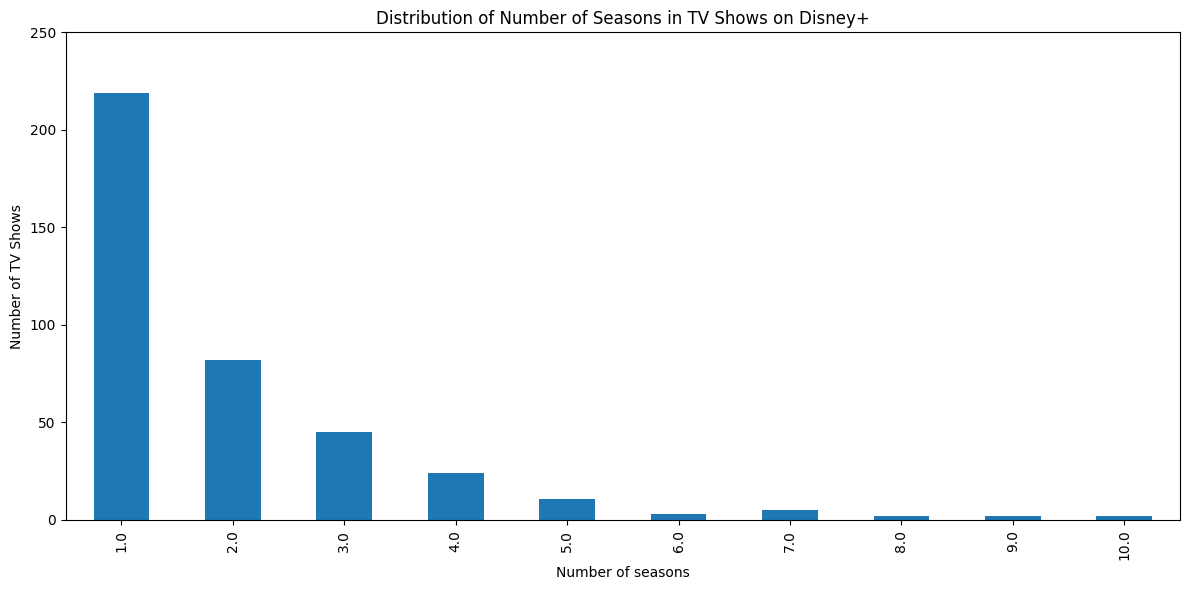

In [18]:
# Filtering for TV shows with 10 seasons or less, as few tv shows ever suceed enough tp exceed this number
filtered_tv = test_tv_shows_df[test_tv_shows_df["duration_seasons"] <= 10]

shows_ax = filtered_tv.groupby("duration_seasons").size().plot(kind="bar", figsize=(12,6))

shows_ax.set_xticks(shows_ax.get_xticks()[::len(shows_ax.get_xticks()) // 10])
shows_ax.set_yticks(shows_ax.get_yticks()[::len(shows_ax.get_yticks()) // 6])
shows_ax.set_xlabel("Number of seasons")
shows_ax.set_ylabel("Number of TV Shows")
shows_ax.set_title("Distribution of Number of Seasons in TV Shows on Disney+")
plt.tight_layout()
plt.show()

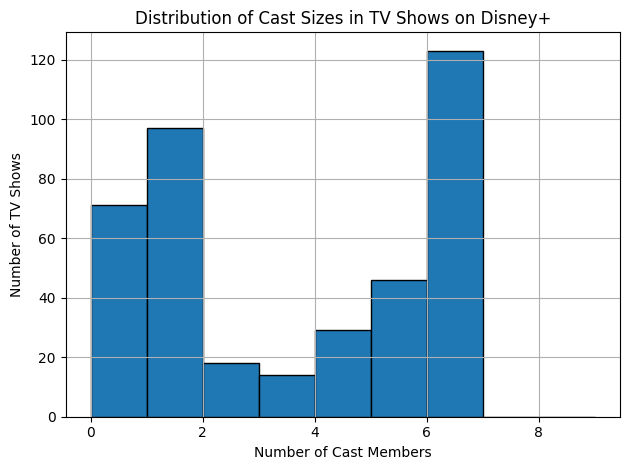

In [28]:
test_tv_shows_df["cast_count"] = test_tv_shows_df["cast"].apply(len)

''' 
Filtering for 10 cast members or less for better visualization, 
as it's shown most of publicly acknowledged shows have at least few cast members
'''

test_tv_shows_df["cast_count"].hist(bins=range(0, 10), edgecolor='black')
plt.xlabel("Number of Cast Members")
plt.ylabel("Number of TV Shows")
plt.title("Distribution of Cast Sizes in TV Shows on Disney+")
plt.tight_layout()
plt.show()

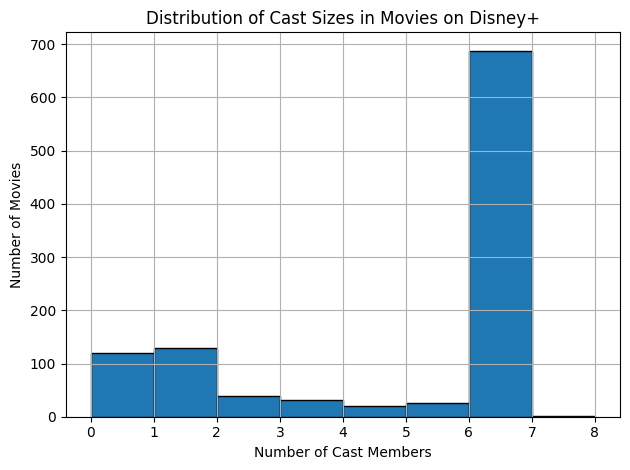

In [38]:
# Movies cast size distribution

test_movies_df["cast_count"] = test_movies_df["cast"].apply(len)
test_movies_df["cast_count"].hist(bins=range(0, 9), edgecolor='black')
plt.xlabel("Number of Cast Members")
plt.ylabel("Number of Movies")
plt.title("Distribution of Cast Sizes in Movies on Disney+")
plt.tight_layout()
plt.show()

In [31]:
disney_media = disney_df.listed_in

disney_genres = []
for film in disney_media:
    for genre in film.split(', '):
        if genre not in disney_genres:
            disney_genres.append(genre)
print(disney_genres)
print(len(disney_genres))

['Animation', 'Family', 'Comedy', 'Musical', 'Docuseries', 'Historical', 'Music', 'Biographical', 'Documentary', 'Action-Adventure', 'Superhero', 'Reality', 'Survival', 'Animals & Nature', 'Kids', 'Coming of Age', 'Drama', 'Fantasy', 'Lifestyle', 'Movies', 'Science Fiction', 'Concert Film', 'Crime', 'Sports', 'Anthology', 'Medical', 'Variety', 'Spy/Espionage', 'Buddy', 'Parody', 'Game Show / Competition', 'Romance', 'Anime', 'Romantic Comedy', 'Thriller', 'Police/Cop', 'Talk Show', 'Western', 'Dance', 'Series', 'Mystery', 'Soap Opera / Melodrama', 'Disaster', 'Travel']
44


In [33]:
disney_unique_cast_members = set()

for cast_entry in disney_df["cast"]:

    # Skip NaN or missing values
    if not isinstance(cast_entry, str):
        continue

    # Split by comma
    for actor in cast_entry.split(","):
        actor = actor.strip()
        if actor:  # skip empty strings
            disney_unique_cast_members.add(actor)

disney_unique_cast_members = list(disney_unique_cast_members)

print(disney_unique_cast_members[:10])
print(len(disney_unique_cast_members))

['Sophia Mitri Schloss', 'Susan Walters', 'T. J. Miller', 'Tim Holt', 'Betty White', 'Milo Manheim', 'Ruggero Pasquarelli', 'Eva Green', "Shaquille O'Neal", 'Charlie Rowe']
3754
